<a href="https://colab.research.google.com/github/jjon215/MLHW_2/blob/master/Third_Arch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


170500096/170498071 [==============================] - 39s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
40000/40000 [==============================] - 20s 511us/step - loss: 1.8982 - acc: 0.2967
Epoch 1/1
40000/40000 [==============================] - 16s 397us/step - loss: 1.6030 - acc: 0.4137
Epoch 1/1
40000/40000 [==============================] - 17s 417us/step - loss: 1.4797 - acc: 0.4640
Epoch 1/1
40000/40000 [==============================] - 16s 394us/step - loss: 1.4015 - acc: 0.4944
Epoch 1/1
40000/40000 [==============================] - 17s 420us/step - loss: 1.3364 - acc: 0.5193
Epoch 1/1
40000/40000 [==============================] - 16s 393us/step - loss: 1.2744 - acc: 0.5440
Epoch 1/1
40000/40

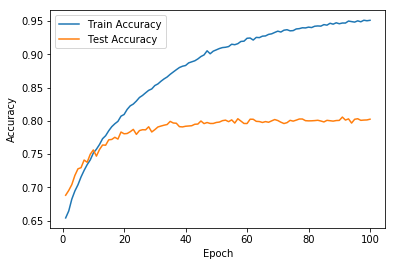

Validation loss: 0.7928498234272003
Validation accuracy: 0.8024


In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

batch_size = 32
num_classes = 10
epochs = 100
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train = list(x_train)
y_train = list(y_train)

val_loss = list()
val_acc = list()

x_val = np.array(x_train[4*10000:(4+1)*10000])
y_val = np.array(y_train[4*10000:(4+1)*10000])
  
x_tra = np.array(x_train[0:4*10000]+x_train[(4+1)*10000:50000])
y_tra = np.array(y_train[0:4*10000]+y_train[(4+1)*10000:50000])
  
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_tra.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
   
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        zca_epsilon=1e-06,  
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.,  
        zoom_range=0.,  
        channel_shift_range=0.,  
        fill_mode='nearest',
        cval=0.,  
        horizontal_flip=True,  # flip images
        vertical_flip=False,  # flip images
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

datagen.fit(x_tra)

for e in range(10):
    batches = 0
    for x_batch, y_batch in datagen.flow(x_tra, y_tra, batch_size=40000):
        model.fit(x_batch, y_batch)
        batches += 1
        if batches >= 1:

            break

History = model.fit(x_tra, y_tra,
          batch_size=batch_size,
          epochs=epochs,                    
          verbose=1,
          validation_data=(x_val, y_val))
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss is :', score[0])
print('Test accuracy is :', score[1])
print(score)
print(History.history)

plotaccuracy = plt.plot(range(1,epochs+1),History.history['acc'],range(1,epochs+1),History.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(plotaccuracy)

print('Validation loss:',History.history['val_loss'][-1])
print('Validation accuracy:',History.history['val_acc'][-1])
